## Loan Prediction with Python 

This tutorial is based on the course [Loan Prediction with Python](https://www.analyticsvidhya.com/blog/2018/07/learn-and-test-your-machine-learning-skills-with-avs-new-practice-problems-and-free-courses/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)

### 1. Problem statement

> *Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.*
***
***From the above statement, we understand that the goal is to predict which loan applicants will be approved***

### 2. Generating Hypotheses  

A crucial step in any model building is to generate a set of hypotheses. Just like [hypothesis testing](http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/) in statistics, it's important that this be done prior to diving into the data. So we may ask **How would a customer details affect loan approval?**
Here are my own hypotheses:   
> - Married people would have a higher chance of being approved compared to single applicants.  
- Approval probability will increase with the level of education and with higher credit score.  
- The higher in income, the higher the probability of been approved for a loan.  
- Approval probability will decrease with the loan amount.  
- There will be an age group dependence:   
    - Apporval probability for people in their early 20's will be lower than people in their 30's-40's.
    - Old and retired people will have a lower chance of approval.
- People who possess other assets such as bussinesses may have higher chance of approval.
- Certain people such as government employees may be considered to have more stable job(income), hence greater chance of approval compared to others such as contractors.

### 3. Data Exploration

The data contains the following features: 

| Variable | Description   |
|:---|------|
| Loan_ID | Unique Loan ID|
| Gender  | Male/Female |
| Married | Applicant married (Y/N)|
| Dependents | Number of dependents|
| Education | Applicant Education (Graduate/ Under Graduate)|
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome| Applicant income|
| CoapplicantIncome| Coapplicant income|
| LoanAmount| Loan amount in thousands|
| Loan_Amount_Term| Term of loan in months|
| Credit_History| credit history meets guidelines|
| Property_Area| Urban/ Semi Urban/ Rural|
| Loan_Status | Loan approved (Y/N) |

In [1]:
import pandas as pd
import numpy as np                     
from scipy import stats           
import matplotlib.pyplot as plt        
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#parse the data into pandas dataframes
df_train = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('data/test_Y3wMUE5_7gLdaTN.csv') 

#make a safe copy of dataframes
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("Train set contains {} observations and {} features".format( df_train.shape[0], df_train.shape[1] )) 
print("Test set contains {} observations and {} features".format( df_test.shape[0], df_test.shape[1] )) 

Train set contains 614 observations and 13 features
Test set contains 367 observations and 12 features


### Testing our Hypotheses

###### Married people would have a higher chance of being approved compared to single applicants

In [5]:
def make_table(df_train, column, target='Loan_Status', groups=['Yes','No']):
    df = df_train[[column, target]].groupby(column).count()
    df.columns = ["Count"]
    df['Approved'] = 0
    df['proportion Approved'] = 0
    
    group1, group2 = groups[0], groups[1] 
    #find the number of approved married people
    married_approved = (df_train[column]==group1) & (df_train[target]=='Y')
    df.loc[group1, 'Approved'] = len(df_train[married_approved])

    #find the number of approved single people
    single_approved = (df_train[column]==group2) & (df_train[target]=='Y')
    df.loc[group2, 'Approved'] = len(df_train[single_approved])
    
    df.loc[group1, 'proportion Approved'] = df.loc[group1, 'Approved']/df.loc[group1, 'Count']
    df.loc[group2, 'proportion Approved'] = df.loc[group2, 'Approved']/df.loc[group2, 'Count']
    return df

df = make_table(df_train, column='Married', target='Loan_Status', groups=['Yes','No'])
df

,Count,Approved,proportion Approved
Married,,,
No,213,134,0.629108
Yes,398,285,0.716080


We see that there are more married (398) applicants than single (213) applicants. We also find that the proportion of married applicants that got approved was higher than the proportion of single applicants that got approved. This agrees with our initial hypothesis. We may perform a more rigourous statistical tests to confirm that the difference in proportions is indeed significant.  

#### Approval probability will increase with the level of education and with higher credit score.

In [6]:
# Check unique classes for variable Education
print("Unique calsses for variable Education", df_train['Education'].unique())

Unique calsses for variable Education ['Graduate' 'Not Graduate']


In [7]:
df = make_table(df_train, column='Education', target='Loan_Status', groups=['Graduate', 'Not Graduate'])
df

,Count,Approved,proportion Approved
Education,,,
Graduate,480,340,0.708333
Not Graduate,134,82,0.611940


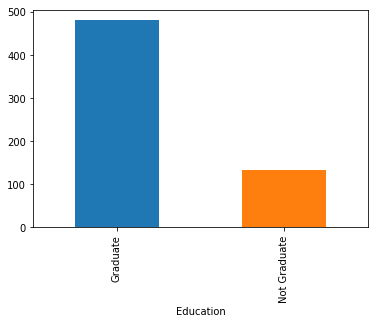

In [8]:
df['Count'].plot(kind='bar')

In [9]:
# Check unique classes for variable Credit history
print("Unique calsses for variable Education", df_train['Credit_History'].unique())

Unique calsses for variable Education [ 1.  0. nan]


In [10]:
df = make_table(df_train, column='Credit_History', target='Loan_Status', groups=[1, 0])
df

,Count,Approved,proportion Approved
Credit_History,,,
0.0,89,7,0.078652
1.0,475,378,0.795789


We find here that applicant with __graduate level__ education have a higher chance of approval than those without graduate education. We also find that those who did not pay their loan in the past (Credit_History=0) have very limited chance (only 0.08) of being approved. All agree with our initial hypothesis. 

#### Is there a gender  bias??

In [11]:
df = make_table(df_train, column='Gender', target='Loan_Status', groups=['Male', 'Female'])
df

,Count,Approved,proportion Approved
Gender,,,
Female,112,75,0.669643
Male,489,339,0.693252


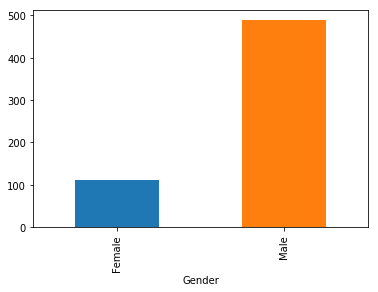

In [12]:
df['Count'].plot(kind='bar')

It's clear from the above plot that there are more male applicants than female applicants. However, it appears that there is no gender significan bias in the approval probability between male and female. (More rigorous statistical tests should be performed to confirm this hipothesis) 

In [13]:
#use crosstap() to to perform same task as previous step
Gender=pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [14]:
#Find proportions by normalizing row-wise
Gender.div(Gender.sum(1).astype(float), axis=0) 

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


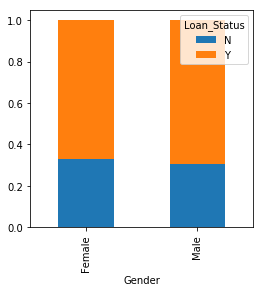

In [15]:
#Same as above, but use the normalize argument of crosstab()
Gender=(pd.crosstab(df_train['Gender'],df_train['Loan_Status'], normalize='index').
    plot(kind="bar", stacked=True, figsize=(4,4)) )
Gender

#### What is the relation between Loan_Status and Property_Area

In [16]:
#Compute number of approved (Y) and disapproved (N) for each property_area category
property_area = pd.crosstab(df_train.Property_Area, df_train.Loan_Status)
property_area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


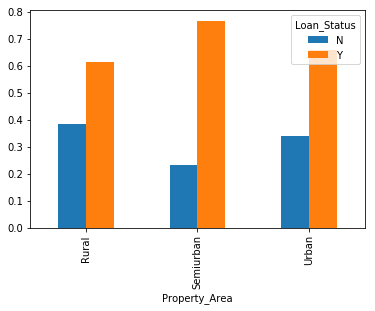

In [17]:
#same as above but use normalize to find proportions instead, then make a bar chart
(pd.crosstab(df_train.Property_Area, df_train.Loan_Status, normalize='index').
                 plot(kind='bar'))

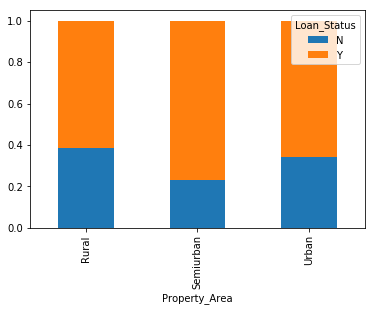

In [18]:
#same as above but use normalize to find proportions instead, then make a stacked bar chart
(pd.crosstab(df_train.Property_Area, df_train.Loan_Status, normalize='index').
                 plot(kind='bar', stacked='True'))

From the above, we see that applicant in the __Semiurban__ area have higher probability of loan approval compared to applicants in urban and rural areas.

#### Looking the variable LoanAmount

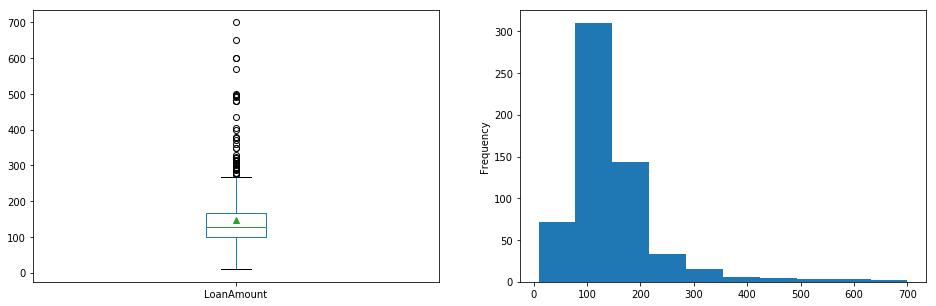

In [19]:
plt.figure(1)
plt.subplot(121)
df_train['LoanAmount'].plot(kind='box', showmeans=True)

plt.subplot(122)
df_train['LoanAmount'].plot(kind='hist', figsize=(16,5))

The box plot above shows that the median loan amount is around 150 and the mean is a bit higher than the median. We also see multiple observations above the 75th percentile, indicating __outliers__. This trend is also reflected in the histogram plot, which skewed to the right. There are a few customer who have been awarded unusually large loan amounts. 

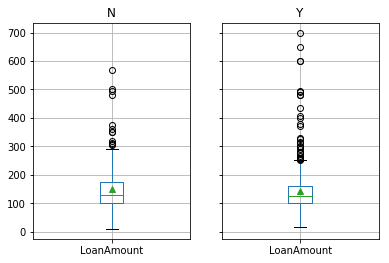

In [20]:
#Comparing Loan Amount between the approve and not approved groups
_ = df_train[['Loan_Status', 'LoanAmount']].groupby('Loan_Status').boxplot(showmeans=True)

The average __Loan Amount__ requested is not much different between the two groups. This suggests that when a loan application is rejected, it's not necessarily because the amount requested was too high. 

### The ApplicantIncome

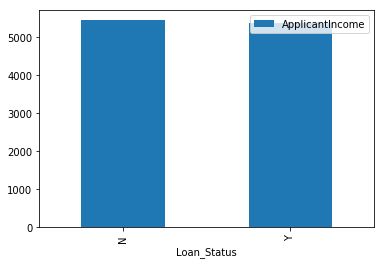

In [21]:
_ = df_train[['Loan_Status','ApplicantIncome']].groupby('Loan_Status').mean().plot(kind='bar')

Looking at the average income does not tell us much. Let's bin the ApplicantIncome (Transform from continuous to ordinal).

In [22]:
min_income = df_train.ApplicantIncome.min()
max_income = df_train.ApplicantIncome.max()
num_bins = 5
bins = np.linspace(min_income, max_income, num_bins)
bins = bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']

print(bins)
df_train['Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)
#df_train.head()

[0, 2500, 4000, 6000, 81000]


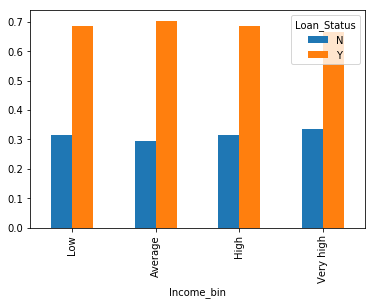

In [23]:
pd.crosstab(df_train.Income_bin, df_train.Loan_Status, normalize='index').plot(kind='bar')

Again, it appears that __ApplicantIncome__ does not affect the approval probability, and this is strange. How about __CoapplicantIncome__ 

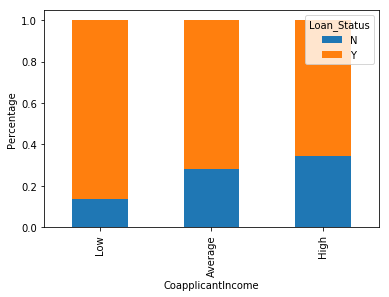

In [24]:
bins=[0,1000,4000,42000]
group=['Low','Average','High']
df_train['Coapplicant_Income_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group) 

Coapplicant_Income_bin=pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

Now we get a result that is even more strange. Low income applicant have higher chance of approval compared to Average and high income applicants. This does not quite make sense. Let's add up the two variables ApplicantIncome and CoapplicantIncome

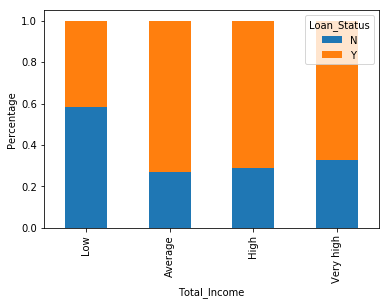

In [25]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Now the proportion of __Low Income__ applicant that get approved is less than the other groups. 
> **We can create a variable which compares the loan amount (call it Y) to the total income (call it X).** say 
$$ Y = \alpha X$$
where $\alpha$ will be a hyperparameter to tune

In [26]:
#some cleaning ...
df_train=df_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True)
df_test['Dependents'].replace('3+', 3,inplace=True)
df_train['Loan_Status'].replace('N', 0,inplace=True)
df_train['Loan_Status'].replace('Y', 1,inplace=True)

> The previous steps are important because models like logistic regression takes only numeric values as input. Hence, it's a good idea to replace N with 0 and Y with 1.

In [27]:
#looking at the correlations
corr = df_train.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [59]:
corr['Loan_Status']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In general, the largest positive correlation occurs between __Loan Status__ and __Credit History__. 

# 4. Missing Value and Outlier Treatment

## 4.1. Missing Values

Before building any model, it's important to carefully impute missing values and also deal with outliers as appropriate. This is because missing values and outliers may affect the model performance as many machine learning algorithms do not deal missing values. Fisrt let's check the number of missing values for each feature. This can be achieved using the [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) method which converts the dataframe into a boolean (__True__ for entries that are missing and __False__ for non missing entires). This [post](https://machinelearningmastery.com/handle-missing-data-python/) is useful to understand how missing values are handles in machine learning.

In [28]:
#This converts the dataframe to boolean
df_train.isnull().head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
#Summing over columns gives us a count of missing values
df_train.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So there are 50 customers without prior credit history. Also, the gender is not specified for 13 customers. We can adopt the following methods to impute missing values:
- Replace with __mean__ or __median__ for numerical variables
- Replace with __mode__ for categorical variables

In [30]:
#checking the data type for each variable
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [31]:
#replace nan with mode for['Gender','Married','Dependents','Credit_History','Self_Employed']
#df_train.dropna(axis=0, how='any',inplace=True)
for feature in ['Gender','Married','Dependents','Self_Employed']:
    df_train[feature].fillna(df_train[feature].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#use pandas.value_counts() to see the number of occurences of each value in Loan_Amount_Term
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
#since 360 is the most occuring value (it's the mode), we will replace nan by 360
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

For LoanAmount, we can either replace NaN with the mean or with the median.
But we saw that the variable LoanAmount if highly skewed, hence it would not be a 
good idea to use the mean since means are very sensitive to outliers. We therefore use the median which is insensitive to outliers

In [34]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

#check that all null values have been taken care of
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
#same approach for test data
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
#df_test.dropna(axis=0, how='any',inplace=True)
for feature in ['Gender','Dependents','Self_Employed', 'Loan_Amount_Term']:
    df_test[feature].fillna(df_train[feature].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)   

#check that all null values have been taken care of
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## 4.2. Outliers

First, let's take a look at how outliers affect different summary statistics.

In [37]:
#sample without outliers
data = pd.Series([1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4])
data.describe()

count    11.000000
mean      2.454545
std       1.035725
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
dtype: float64

In [38]:
#sample with outliers
data = pd.Series([1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 400])
data.describe()

count     11.000000
mean      38.454545
std      119.914439
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max      400.000000
dtype: float64

we see that the median is not affected but the mean and the standard deviation are largely affected. We can perform a __log transform__ which will greatly reduce the effect of large values.

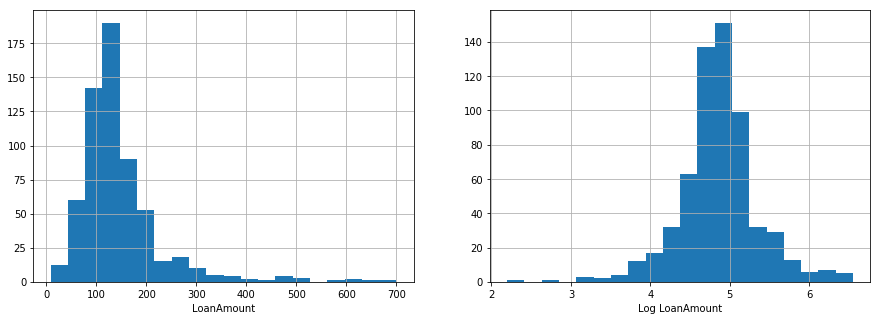

In [39]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
plt.figure()
plt.subplot(121)
df_train['LoanAmount'].hist(bins=20)
plt.xlabel('LoanAmount')
plt.subplot(122)
df_train['LoanAmount_log'].hist(bins=20, figsize=(15,5))
plt.xlabel('Log LoanAmount')

#same transform on test data
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

# 5. Evaluation Metrics

Refer to [this post](https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/) to learn about evaluation metrics

# 6. Building the Model part 1

In [40]:
#First let's drop the Loan_ID feature. It's not important for the model
df_train.drop('Loan_ID', axis=1, inplace=True)
df_test.drop('Loan_ID', axis=1, inplace=True)

#We found that there was no gender bias in Loan approval, so let's drop the variable Gender
#df_train.drop(['LoanAmount'], axis=1, inplace=True)
#df_test.drop(['LoanAmount'], axis=1, inplace=True)


#Separate label from data
#X = df_train.drop('Loan_Status',1)
X = df_train.drop(['Loan_Status'],axis=1)
y = df_train.Loan_Status

Another important step is to transform categorical variables into numerical variables. This can be achieved using the pandas __get_dummies__ function. For instance, when __get_dummies__ is applied, the feature __Gender__ will be transformed into two new features called __Gender_Male__ and __Gender_Female__. __Gender_male__ will have value 0(if not male) and 1(if male). __Gender_Female__ will be similarly defined.

In [41]:
X = pd.get_dummies(X)
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

#New set of features

X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [42]:
#split the train set into train and cross validation sets
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

model = LogisticRegression(C=1, random_state=1)
_ = model.fit(x_train, y_train)

#Make predictions using the cross validation set
pred_cv = model.predict(x_cv)
pred_test = model.predict(df_test)

#calculate accuracy score for the cross validation set
print("Accuracy score for cross validation {:6.2f}".format(accuracy_score(y_cv,pred_cv)))

Accuracy score for cross validation   0.78


Our model has accuracy score of 0.827. It's always a good idea to compare model accuracy with the accuracy of a [__DummyClassifier__](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

In [43]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x_train, y_train)
pred_dummy_cv = dummy.predict(x_cv)
accuracy_score(y_cv,pred_dummy_cv)

0.6

The accuracy score of our model is greater than that of a dummy classifier, so we're on the right track. Now Let's read in and fill the submission file. This file currently contains only column names. We need to assign the __Load_ID__ columns to the corresponding column from the test set, and assign __Load_Status__ to the prediction we made.

In [44]:
submission = pd.read_csv("data/Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission.head()

,Loan_ID,Loan_Status


In [45]:
submission.Loan_ID = df_test_original.Loan_ID
submission.Loan_Status = pred_test
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


Next, we need to transform __Loan_Status__ back to original format. i.e. __Y__ for __Loan_Status = 1__ and __N__ for __Loan_Status = 0__

In [46]:
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [47]:
submission.to_csv('logistic.csv', index=False)

There we go! We are ready to upload a first solution [here](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

# Logistic Regression using stratified k-folds cross validation

In the method, the data is split into k-folds such that each fold contains roughly the same proportions of the different types of class labels. For instance, if the original data is approximately 40% class 1 and 60% class 2, then each fold should contain about 40% class 1 and 60% class 2.

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

i = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    
    ypred_valid = model.predict(X_valid)
    score_valid = accuracy_score(y_valid, ypred_valid)
    print("The Accuracy Score for fold {} of 5 is {:4.2f}".format(i, score_valid))
    i+=1

pred_proba = model.predict_proba(X_valid)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_valid, pred_proba)

The Accuracy Score for fold 1 of 5 is 0.80
The Accuracy Score for fold 2 of 5 is 0.83
The Accuracy Score for fold 3 of 5 is 0.81
The Accuracy Score for fold 4 of 5 is 0.80
The Accuracy Score for fold 5 of 5 is 0.83


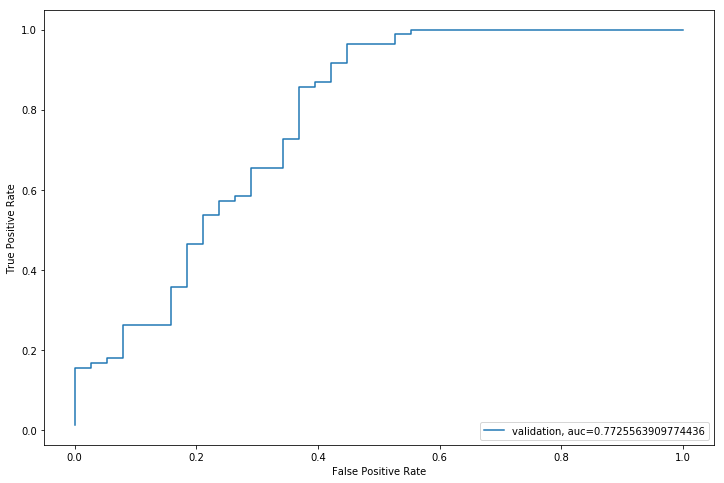

In [49]:
auc = metrics.roc_auc_score(y_valid, pred_proba)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We can now use the model to make predictions on our test data and create a new submission file

In [50]:
pred_test = model.predict(df_test)
submission.Loan_ID = df_test_original.Loan_ID
submission.Loan_Status = pred_test

#create original labels
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_Status'].replace(0,'N', inplace=True)

#write to csv
submission.to_csv('logistic_skfold.csv', index=False)

# Feature Engineering

In some cases, combining certain features may lead to better models. For instance, Logistic Regression models assume that features are independent. Therefore, if two features are strongly correlated, then using them as two separate features may reduce the performance of the model. In the present case, there may be a correlation between ApplicantIncome and CoApplicantIncome.

In [51]:
df_train[['ApplicantIncome', 'CoapplicantIncome']].corr()

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.116605
CoapplicantIncome,-0.116605,1.000000


There is a small negative correlation between ApplicantIncome and CoApplicantIncome. So let's create a new variable __Total_Income__ 

In [52]:
#Creature new variable TotalIncome
df_train['Total_Income'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']
df_test['Total_Income'] = df_test['ApplicantIncome']+df_test['CoapplicantIncome']

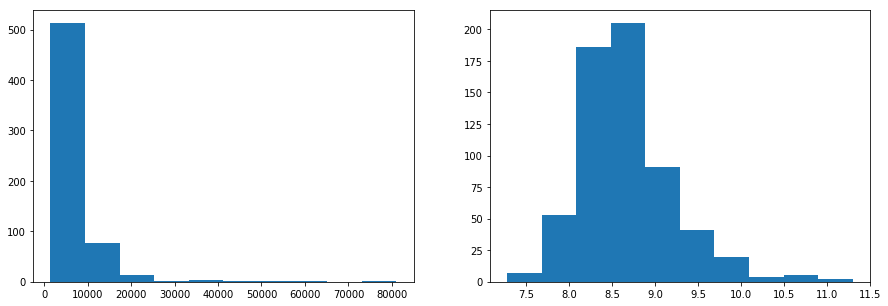

In [53]:
df_train['log_Total_Income'] = np.log(df_train['Total_Income'])

plt.figure()
plt.subplot(121)
df_train['Total_Income'].hist(grid=False)
plt.subplot(122)
df_train['log_Total_Income'].hist(grid=False, figsize=(15,5))

Notice that the __Total_Income__ is highly skewed to the right. Therefore, we make a log transform of the variable.

In [54]:
df_train['EMI'] = df_train['LoanAmount']/df_train['Loan_Amount_Term']
df_test['EMI'] = df_test['LoanAmount']/df_test['Loan_Amount_Term']

df_train['Balance Income'] = df_train['Total_Income']-(df_train['EMI']*1000) # Multiply with 1000 to make the units equal 
df_test['Balance Income'] = df_test['Total_Income']-(df_test['EMI']*1000)

df_train = df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
df_test  = df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

##### Let's rebuild the model to see if feature engineering improves model accuracy

In [55]:
#prepare the data 
X = df_train.drop('Loan_Status', axis=1).drop('Total_Income', axis=1)
y = df_train.Loan_Status

In [56]:
i = 1
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y.loc[train_index], y.loc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    
    ypred_valid = model.predict(X_valid)
    score_valid = accuracy_score(y_valid, ypred_valid)
    print("The Accuracy Score for fold {} of 5 is {:4.2f}".format(i, score_valid))
    i+=1

pred_proba = model.predict_proba(X_valid)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_valid, pred_proba)

The Accuracy Score for fold 1 of 5 is 0.79
The Accuracy Score for fold 2 of 5 is 0.83
The Accuracy Score for fold 3 of 5 is 0.80
The Accuracy Score for fold 4 of 5 is 0.79
The Accuracy Score for fold 5 of 5 is 0.83


__The above feature engineering does not improve the accurary so we try other models__ 

#### >> [Decision Tree](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six) with 5-fold cross validation

In [57]:
from sklearn import tree
i = 1
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y.loc[train_index], y.loc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(X_train, y_train)
    
    ypred_valid = model.predict(X_valid)
    score_valid = accuracy_score(y_valid, ypred_valid)
    print("The Accuracy Score for fold {} of 5 is {:4.2f}".format(i, score_valid))
    i+=1

pred_proba = model.predict_proba(X_valid)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_valid, pred_proba)

The Accuracy Score for fold 1 of 5 is 0.73
The Accuracy Score for fold 2 of 5 is 0.75
The Accuracy Score for fold 3 of 5 is 0.70
The Accuracy Score for fold 4 of 5 is 0.67
The Accuracy Score for fold 5 of 5 is 0.71


Decision Tree is worse than Logistic Regression

#### Random Forest (see [here](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six))

In [58]:
from sklearn.ensemble import RandomForestClassifier

i = 1
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y.loc[train_index], y.loc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(X_train, y_train)
    
    ypred_valid = model.predict(X_valid)
    score_valid = accuracy_score(y_valid, ypred_valid)
    print("The Accuracy Score for fold {} of 5 is {:4.2f}".format(i, score_valid))
    i+=1

pred_proba = model.predict_proba(X_valid)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_valid, pred_proba)

The Accuracy Score for fold 1 of 5 is 0.77
The Accuracy Score for fold 2 of 5 is 0.81
The Accuracy Score for fold 3 of 5 is 0.74
The Accuracy Score for fold 4 of 5 is 0.73
The Accuracy Score for fold 5 of 5 is 0.79
